# Global GDP Analysis 2020 - 2025 

## Introduction 

This project explores global GDP trends between 2020 and 2025, using country-level data to uncover patterns in economic growth, regional contributions, and shifts in global rankings. By analyzing GDP distributions, growth trajectories, and regional comparisons, the study aims to highlight not only the dominant economies driving global output but also the emerging markets that are reshaping the world’s economic landscape. The insights gained can provide a deeper understanding of how regions evolve economically, the persistence of inequality, and the potential implications for global development and investment strategies.

##### Problem Statement
The global economy is constantly evolving, with GDP acting as one of the most important indicators of a nation’s economic strength. Between 2020 and 2025, the world has experienced both resilience and disruption; from recovery phases following the pandemic to regional growth shifts and emerging market expansions. Understanding these dynamics is critical for identifying which regions drive global performance, how economic power is distributed, and which countries are rising or declining in relative importance.

## Objectives

This analysis aims to answer the following key questions:

How has global GDP evolved from 2020 to 2025?

Which regions contribute the most to global GDP, and how has this share changed over time?

What trends exist among the top economies compared to the rest of the world?

Are there noticeable differences in growth rates between developed and emerging economies?

Which countries have gained or lost significant positions in the global GDP rankings?

## Methodology 

The analysis follows a structured approach to ensure clarity, reproducibility, and meaningful insights:

#### Dataset Preparation

The dataset consists of GDP values for 197 countries between 2020 and 2025.

Columns were originally in wide format (Country | 2020 | 2021 | … | 2025) and were reshaped into long format (Country | Year | GDP).

Rows with partial missing GDP values were identified; missing entries were imputed using the row **mean** to maintain consistency, while still retaining transparency in the dataset.

#### Data Cleaning & Enrichment

Countries were mapped to their respective regions (continents) using the pycountry-convert library.

Special cases like Kosovo and Timor-Leste manually assigned where the automated mapping (pycountry_convert) did not recognize them.

Missing values were identified and considered in the analysis, with interpolation as an optional step where appropriate.


#### Exploratory Data Analysis (EDA)

Univariate Analysis: Examined individual variables such as GDP distribution, continental contributions, and yearly changes.

Bivariate & Comparative Analysis: Explored relationships, including GDP vs growth rate, continental distributions, and top 5 economies compared to the rest of the world.

#### Visualization & Insights

Clear, well-labeled plots (line charts, boxplots, scatterplots, and pie charts) were used to reveal economic trends and disparities.

Insights were framed around strategic questions relevant to global development, investment, and policymaking.

#### Interpretation & Recommendations

Findings were translated into practical insights, highlighting dominant continents, emerging markets, and shifts in global rankings.




### ----- The Project analysis starts here -----

In [48]:
#Importing all necessary libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import pycountry_convert as pc

In [2]:
#Loading the dataset 
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\GDP(2020-2025)\2020-2025.csv")

In [ ]:
#This is how the dataset looks like in wide-format
print(data.head())

       Country    2020      2021      2022      2023      2024      2025
0  Afghanistan   20136   14278.0   14501.0   17248.0       NaN       NaN
1      Albania   15271   18086.0   19185.0   23388.0   27259.0   28372.0
2      Algeria  164774  185850.0  225709.0  247789.0  264913.0  268885.0
3      Andorra    2885    3325.0    3376.0    3786.0    4038.0    4035.0
4       Angola   66521   84375.0  142442.0  109764.0  115946.0  113343.0


In [4]:
#Converting the dataset from wide to long format

data_long = pd.melt(data, id_vars=('Country'), var_name='Year', value_name='GDP')
data_long['Year'] = data_long['Year'].astype(int)

In [ ]:
#This is how the dataset looks like in long-format
print(data_long.head())

       Country  Year       GDP Continent
0  Afghanistan  2020   20136.0      Asia
1      Albania  2020   15271.0    Europe
2      Algeria  2020  164774.0    Africa
3      Andorra  2020    2885.0    Europe
4       Angola  2020   66521.0    Africa


In [ ]:
#Mapping Country to Continent

# Special cases for countries pycountry_convert doesn't know
special_country_continent = {
    "Kosovo": "Europe",
    "Timor-Leste": "Asia"
}

def country_to_continent(country_name):
    # Check special cases first
    if country_name in special_country_continent:
        return special_country_continent[country_name]

    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except (KeyError, AttributeError):
        return 'Unknown'

# Apply the mapping function
data_long['Continent'] = data_long['Country'].apply(country_to_continent)

# Checking results
print(data_long[['Country', 'Continent']])


          Country Continent
0     Afghanistan      Asia
1         Albania    Europe
2         Algeria    Africa
3         Andorra    Europe
4          Angola    Africa
...           ...       ...
1171      Vietnam      Asia
1172    Palestine      Asia
1173        Yemen      Asia
1174       Zambia    Africa
1175     Zimbabwe    Africa

[1176 rows x 2 columns]


In [36]:
#checking for missing values
print(data_long.isnull().sum())

Country       0
Year          0
GDP          17
Continent     0
dtype: int64


In [ ]:
#Checking the missing values in GDP column to get more insights
missing_gdp = data_long[data_long['GDP'].isnull()]
print(missing_gdp)

          Country  Year  GDP Continent
250       Eritrea  2021  NaN    Africa
365         Syria  2021  NaN      Asia
446       Eritrea  2022  NaN    Africa
561         Syria  2022  NaN      Asia
642       Eritrea  2023  NaN    Africa
757         Syria  2023  NaN      Asia
784   Afghanistan  2024  NaN      Asia
838       Eritrea  2024  NaN    Africa
953         Syria  2024  NaN      Asia
976     Palestine  2024  NaN      Asia
980   Afghanistan  2025  NaN      Asia
1034      Eritrea  2025  NaN    Africa
1076      Lebanon  2025  NaN      Asia
1111     Pakistan  2025  NaN      Asia
1141    Sri Lanka  2025  NaN      Asia
1149        Syria  2025  NaN      Asia
1172    Palestine  2025  NaN      Asia


In [42]:
#Filling the missing values with the mean GDP of the respective continent for that year
data_long['GDP'] = data_long.groupby('Year')['GDP'].transform(lambda x: x.fillna(x.mean()))


Missing GDP values were filled using the mean GDP for each specific year, rather than a global or overall mean. This approach ensures that the imputed values reflect the economic scale and trends of that particular year, preserving temporal consistency and reducing the risk of introducing bias across different time periods. By doing so, the dataset remains complete and comparable across countries while maintaining realistic year-to-year variation.

In [45]:
#Checking to see if we still have any missing values in the GDP column 
print(data_long[data_long['GDP'].isnull()])

Empty DataFrame
Columns: [Country, Year, GDP, Continent]
Index: []


After handling missing values, the dataset contains no null entries, as confirmed by checking for missing values across all columns.

In [46]:
#Summary statistics of GDP
print(data_long['GDP'].describe())

count    1.176000e+03
mean     5.318652e+05
std      2.360140e+06
min      5.200000e+01
25%      1.237350e+04
50%      4.386000e+04
75%      2.955090e+05
max      3.050722e+07
Name: GDP, dtype: float64


## Visualizations of the dataset


#### - Univariate analysis

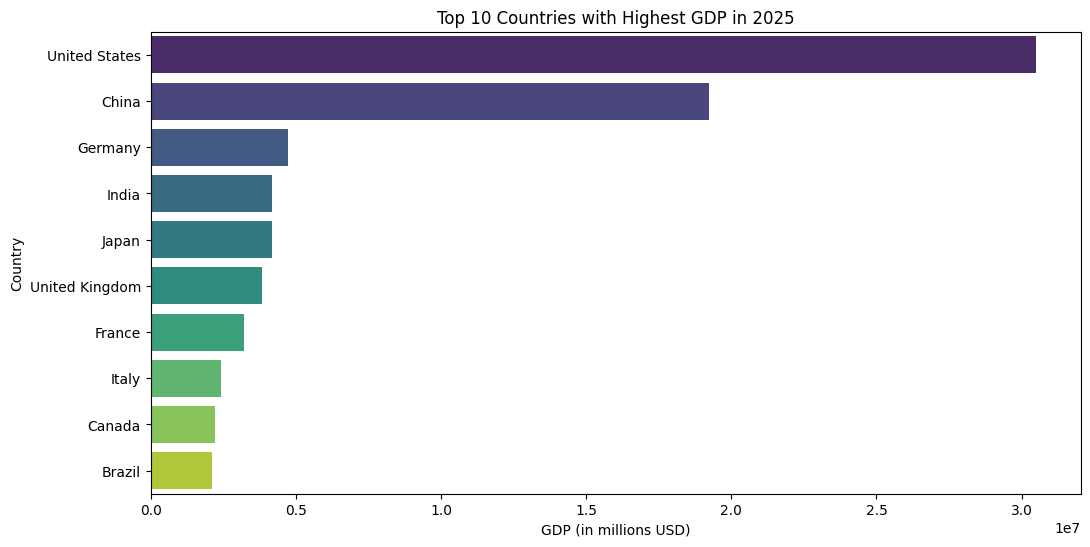

In [55]:
#Top 10 countries with highest GDP in 2025

top_10_2025 = data_long[data_long['Year'] == 2025].sort_values(by='GDP', ascending=False).head(10)

top_10_2025['hue'] = top_10_2025['Country']  # just to color each country differently

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x='GDP',
    y='Country',
    data=top_10_2025,
    hue='hue',
    dodge=False,
    palette='viridis'
)

plt.title('Top 10 Countries with Highest GDP in 2025')
plt.xlabel('GDP (in millions USD)')
plt.ylabel('Country')
plt.legend([], [], frameon=False)  # hides the legend
plt.show()


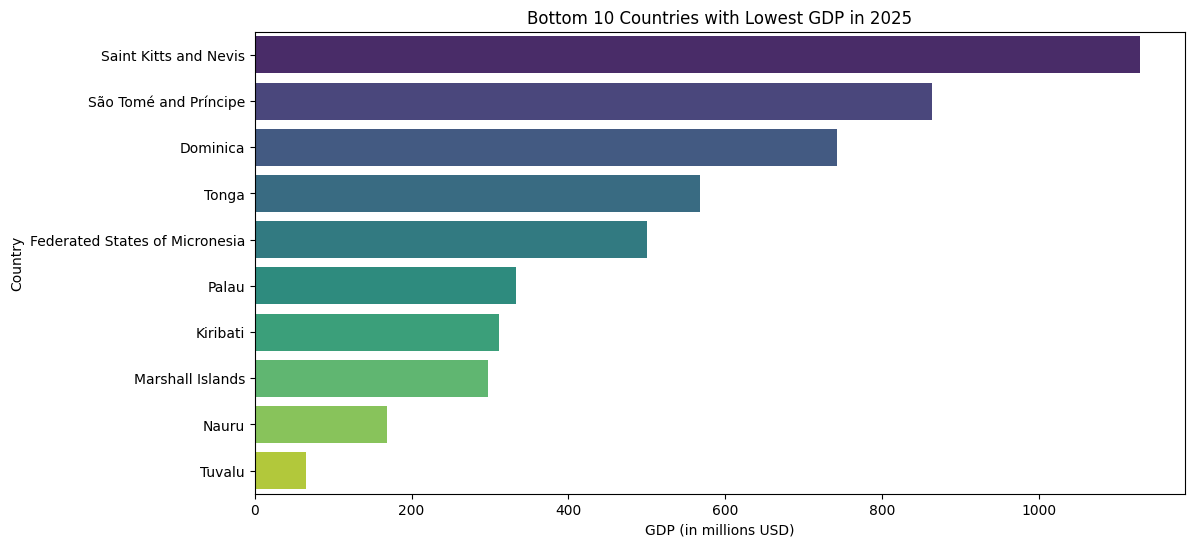

In [61]:
# Bottom 10 countries with lowest GDP in 2025
Bottom_10_2025 = data_long[data_long['Year'] == 2025].sort_values(by='GDP', ascending=False).tail(10)
Bottom_10_2025['hue'] = Bottom_10_2025['Country']  # for coloring

plt.figure(figsize=(12, 6))
sns.barplot(
    x='GDP',
    y='Country',
    data=Bottom_10_2025,
    hue='hue',
    dodge=False,
    palette='viridis'
)

plt.title('Bottom 10 Countries with Lowest GDP in 2025')
plt.xlabel('GDP (in millions USD)')
plt.ylabel('Country')
plt.legend([], [], frameon=False)
plt.show()

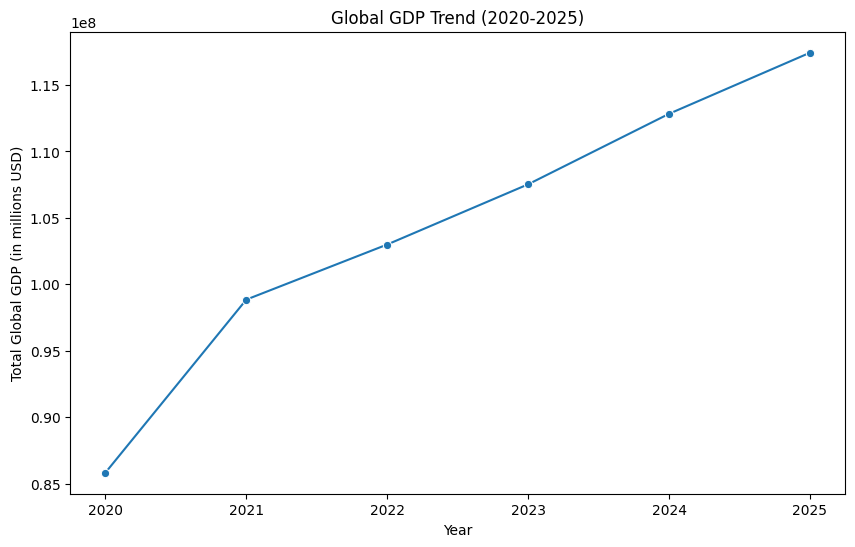

In [57]:
#Yearly GDP Trend

Global_trend = data_long.groupby('Year')['GDP'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x = Global_trend.index, y= Global_trend.values, marker = 'o')
plt.title('Global GDP Trend (2020-2025)')
plt.xlabel('Year')
plt.ylabel('Total Global GDP (in millions USD)')
plt.show()

The line plot of global GDP from 2020 to 2025 shows a consistent upward trend, reflecting overall growth in the world economy. This increase is likely driven by several factors, including recovery from the economic slowdowns experienced during the early 2020s, expansion in major economies such as the US, China, and India, and growth in emerging markets that contributed to higher production, trade, and investment levels. Additionally, technological advancements, increased industrial output, and improved service sectors in many countries may have further supported the rise in total global GDP over this period.

In [67]:


#global trend (sum GDP per year and growth)
global_trend = data_long.groupby('Year')['GDP'].sum()
global_growth = global_trend.pct_change() * 100
global_growth = global_growth.fillna(0)

print(global_growth)


Year
2020     0.000000
2021    15.177786
2022     4.194691
2023     4.397835
2024     4.934185
2025     4.074154
Name: GDP, dtype: float64


The GDP growth percentage for 2020 is recorded as 0.00 because there is no previous year in the dataset to compare it against. Growth calculations require a baseline (previous year), which only becomes available from 2021 onward.

The calculated growth rates indicate that global GDP experienced a sharp rebound in 2021, with a growth of 15.18%, likely reflecting recovery from the economic slowdown in 2020. From 2022 onwards, growth stabilized at a more moderate rate between 4% and 5%, suggesting steady expansion in the global economy after the initial post-slowdown surge. This pattern highlights both the resilience of global markets and the return to a more sustainable growth trajectory following the exceptional recovery year.

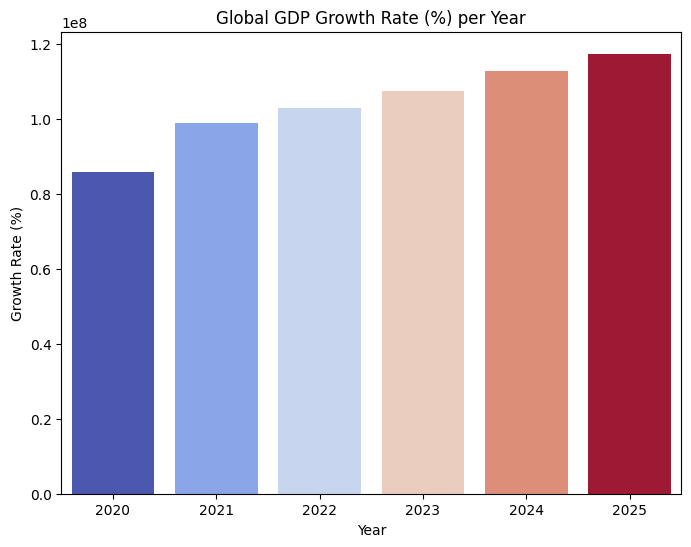

In [73]:

global_growth_data = global_trend.reset_index()
global_growth_data.columns = ['Year', 'GrowthRate']
global_growth_data['hue'] = global_growth_data['Year']

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Year',
    y='GrowthRate',
    data=global_growth_data,
    hue='hue',
    dodge=False,
    palette='coolwarm',
    legend=False
)

plt.title("Global GDP Growth Rate (%) per Year")
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.show()

### - Bivariate Analysis

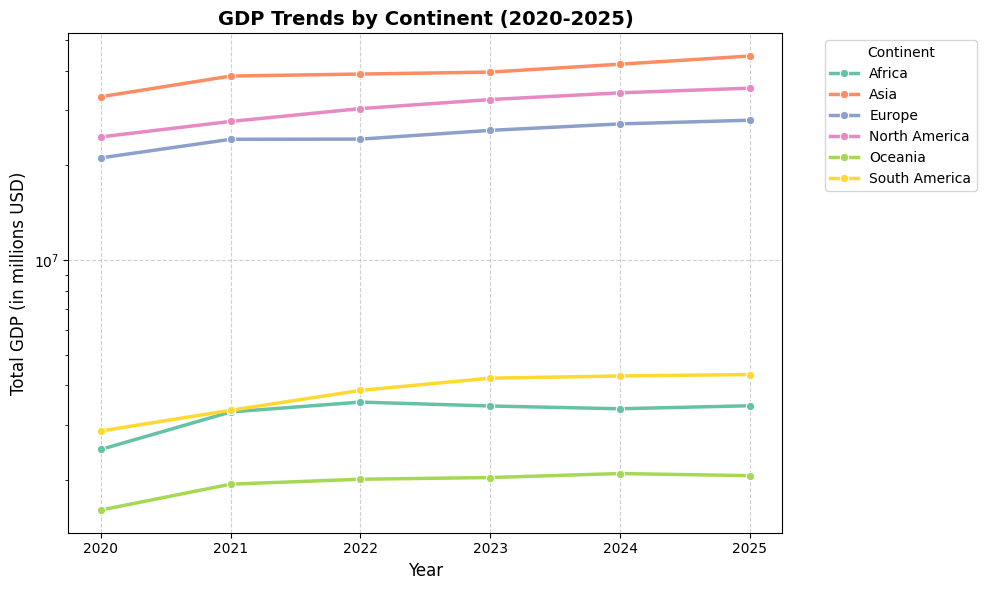

In [104]:
#GDP trends by Continent

plt.figure(figsize=(10, 6))
sns.lineplot(
    data=data_long.groupby(['Year', 'Continent'])['GDP'].sum().reset_index(),
    x='Year',
    y='GDP',
    hue='Continent',
    marker='o',
    linewidth=2.5,
    palette='Set2', #color palette
    errorbar=None 
)

plt.title("GDP Trends by Continent (2020-2025)", fontsize=14, fontweight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total GDP (in millions USD)", fontsize=12)
plt.yscale("log")  # keep only if needed, otherwise comment out
plt.grid(True, linestyle="--", alpha=0.6)

# Move legend outside
plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

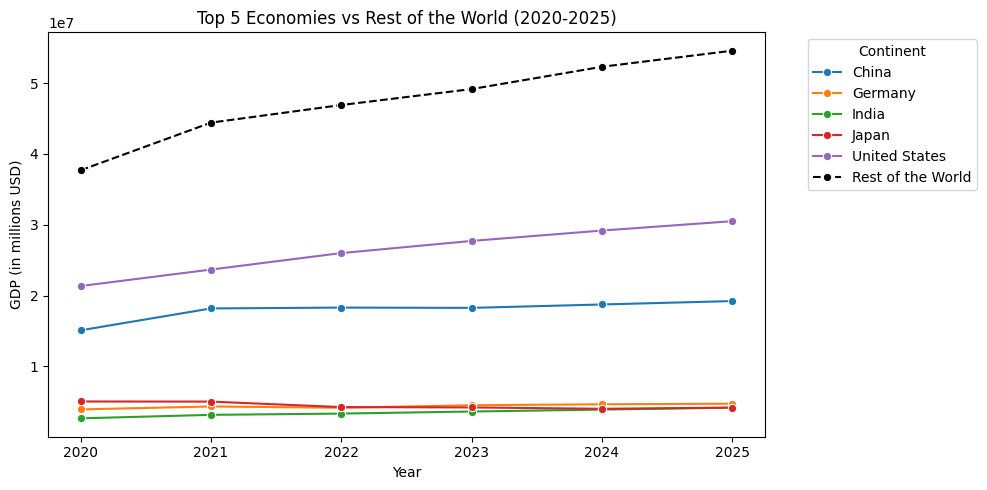

In [103]:
#Top 5 Economies vs Rest of the World

#Top 5 countries based on 2025 GDP
top5 = data_long[data_long['Year'] == 2025].nlargest(5, 'GDP')['Country']
plt.figure(figsize=(10, 5))
sns.lineplot(data = data_long[data_long['Country'].isin(top5)], x='Year', y='GDP', hue='Country', marker='o')

#Adding Rest of the World

Rest_world = data_long[~data_long['Country'].isin(top5)].groupby('Year')['GDP'].sum().reset_index()
sns.lineplot(data=Rest_world, x='Year', y='GDP', label='Rest of the World', marker='o', color='black', linestyle='--')
plt.title('Top 5 Economies vs Rest of the World (2020-2025)')
plt.xlabel('Year')
plt.ylabel('GDP (in millions USD)')

plt.legend(title="Continent", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

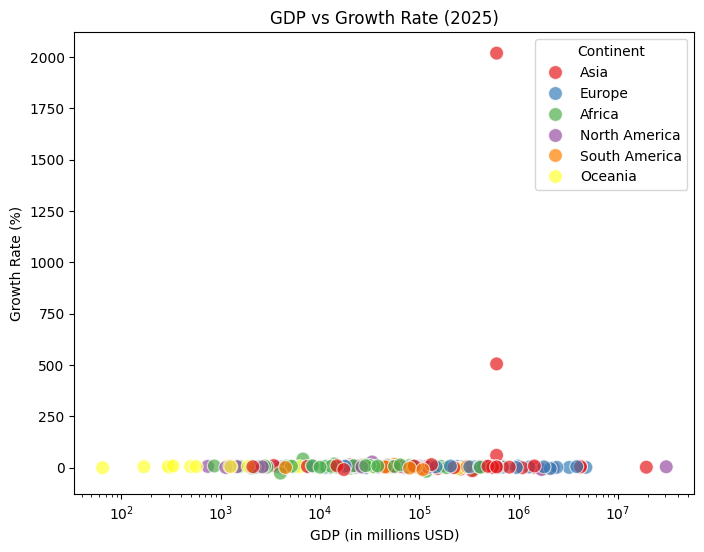

In [86]:
#GDP vs Growth Rate

#Calculate annual GDP growth rate for each country

data_long['GrowthRate'] = data_long.groupby('Country')['GDP'].pct_change() * 100
data_long['GrowthRate'] = data_long['GrowthRate'].fillna(0)

plt.figure(figsize=(8, 6))
sns.scatterplot(data = data_long[data_long['Year'] == 2025], x='GDP', y='GrowthRate', hue='Continent', palette='Set1', s=100, alpha=0.7)
plt.title('GDP vs Growth Rate (2025)')
plt.xlabel('GDP (in millions USD)')
plt.ylabel('Growth Rate (%)')
plt.xscale('log')  # Log scale for better visualization 
plt.show()

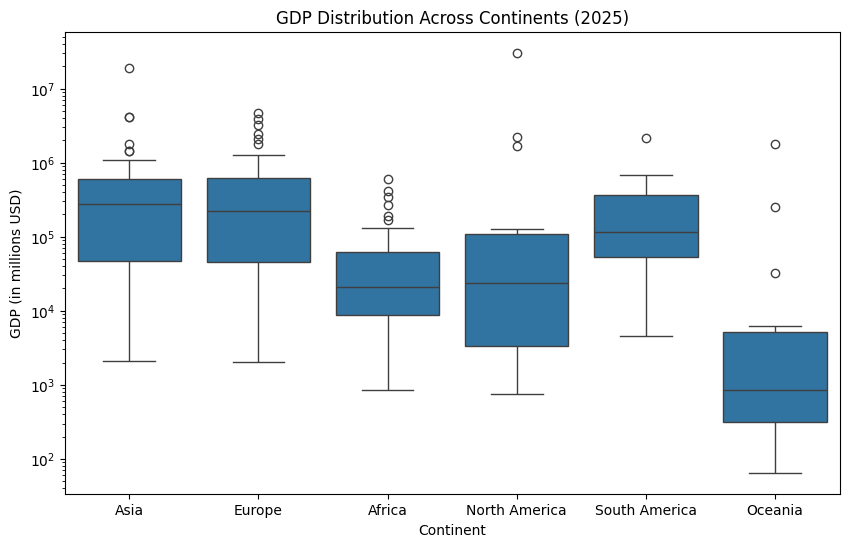

In [ ]:
#GDP Distribution Across Continents

plt.figure(figsize=(10,6))
sns.boxplot(data = data_long[data_long['Year'] == 2025], x='Continent', y='GDP')
plt.title('GDP Distribution Across Continents (2025)')
plt.yscale('log')  # Log scale for better visualization
plt.ylabel('GDP (in millions USD)')
plt.xlabel('Continent')
plt.show()

In [ ]:

#Rank countries in 2020 and 2025
rank_2020 = data_long[data_long['Year'] == 2020][['Country', 'GDP']].sort_values(by='GDP', ascending=False).reset_index(drop=True)
rank_2025 = data_long[data_long['Year'] == 2025][['Country', 'GDP']].sort_values(by='GDP', ascending=False).reset_index(drop=True)

#Add rank columns
rank_2020['Rank_2020'] = rank_2020.index + 1
rank_2025['Rank_2025'] = rank_2025.index + 1

#Merge ranks
rank_changes = pd.merge(rank_2020[['Country', 'Rank_2020']], 
                        rank_2025[['Country', 'Rank_2025']], 
                        on='Country')

#Compute change (positive means improvement, negative means decline)
rank_changes['Change'] = rank_changes['Rank_2020'] - rank_changes['Rank_2025']

#Show top 10 countries with the biggest rank improvements
print(rank_changes.sort_values("Change", ascending=False).head(10))

         Country  Rank_2020  Rank_2025  Change
172      Eritrea        173         26     147
123    Palestine        124         27      97
115  Afghanistan        116         28      88
106      Lebanon        107         31      76
79         Syria         80         32      48
65     Sri Lanka         66         29      37
154       Guyana        155        125      30
149   Kyrgyzstan        150        135      15
128        Haiti        129        115      14
90     Venezuela         91         77      14


Between 2020 and 2025, several countries achieved significant improvements in their GDP rankings, highlighting strong economic growth or recovery.

Eritrea experienced the largest leap, moving 147 positions from 173rd to 26th. This dramatic improvement suggests major economic expansion and increased activity in key sectors.

Palestine rose 97 ranks, reflecting accelerated development and potential stabilization in its economic output.

Afghanistan climbed 88 positions, signaling recovery and growth despite ongoing challenges in infrastructure and investment.

Lebanon improved by 76 ranks, showing signs of economic stabilization and resilience following previous downturns.

Syria increased 48 positions, suggesting a gradual economic rebound in the post-conflict period.

Sri Lanka jumped 37 ranks, indicating strong economic reforms or growth in sectors like services and exports.

Guyana rose 30 positions, likely benefiting from emerging industries such as oil and gas, which have boosted its national income.

Kyrgyzstan advanced 15 ranks, showing steady growth relative to its regional peers.

Haiti climbed 14 positions, reflecting modest improvements in economic activity and resilience.

Venezuela also gained 14 ranks, hinting at a slight recovery in its economy after years of contraction.

These improvements highlight countries that are either emerging as new economic players or are recovering from previous challenges, marking them as important economies to watch in the global landscape.

In [95]:
#Rank countries in 2020 and 2025
rank_2020 = data_long[data_long['Year'] == 2020][['Country', 'GDP']].sort_values(by='GDP', ascending=False).reset_index(drop=True)
rank_2025 = data_long[data_long['Year'] == 2025][['Country', 'GDP']].sort_values(by='GDP', ascending=False).reset_index(drop=True)

#Add rank columns
rank_2020['Rank_2020'] = rank_2020.index + 1
rank_2025['Rank_2025'] = rank_2025.index + 1

#Merge ranks
rank_changes = pd.merge(rank_2020[['Country', 'Rank_2020']], 
                        rank_2025[['Country', 'Rank_2025']], 
                        on='Country')

#Compute change (positive means improvement, negative means decline)
rank_changes['Change'] = rank_changes['Rank_2020'] - rank_changes['Rank_2025']

#Show top 10 countries with the biggest rank improvements
print(rank_changes.sort_values("Change", ascending=False).tail(10))

      Country  Rank_2020  Rank_2025  Change
24   Thailand         25         37     -12
78    Belarus         79         93     -14
88      Libya         89        103     -14
71      Ghana         72         87     -15
98      Sudan         99        117     -18
30      Egypt         31         50     -19
74    Myanmar         75         94     -19
116      Laos        117        142     -25
114     Yemen        115        141     -26
27    Nigeria         28         64     -36


Between 2020 and 2025, several countries experienced declines in their GDP rankings, reflecting slower relative growth compared to other economies or economic challenges.

Thailand dropped 12 positions, from 25th to 37th, suggesting slower expansion relative to regional peers.

Belarus fell 14 ranks, moving from 79th to 93rd, indicating economic stagnation or external pressures affecting its growth.

Libya also declined 14 positions, reflecting instability and continued challenges in economic recovery.

Ghana lost 15 ranks, moving from 72nd to 87th, possibly due to slower industrial or export growth compared to neighboring countries.

Sudan dropped 18 positions, signaling economic difficulties, including potential structural or political constraints.

Egypt fell 19 ranks, moving from 31st to 50th, suggesting that its growth, while positive, lagged behind faster-growing economies.

Myanmar also lost 19 positions, reflecting economic disruption and slower development during this period.

Laos declined 25 ranks, from 117th to 142nd, highlighting a relative slowdown in economic momentum.

Yemen fell 26 positions, reflecting ongoing instability and persistent challenges in rebuilding its economy.

Nigeria experienced the largest drop, losing 36 ranks, from 28th to 64th, indicating slower growth despite being a major regional economy.

These declines highlight countries facing economic hurdles or slower growth relative to global peers, emphasizing the challenges some economies are encountering in maintaining or expanding their GDP positions.

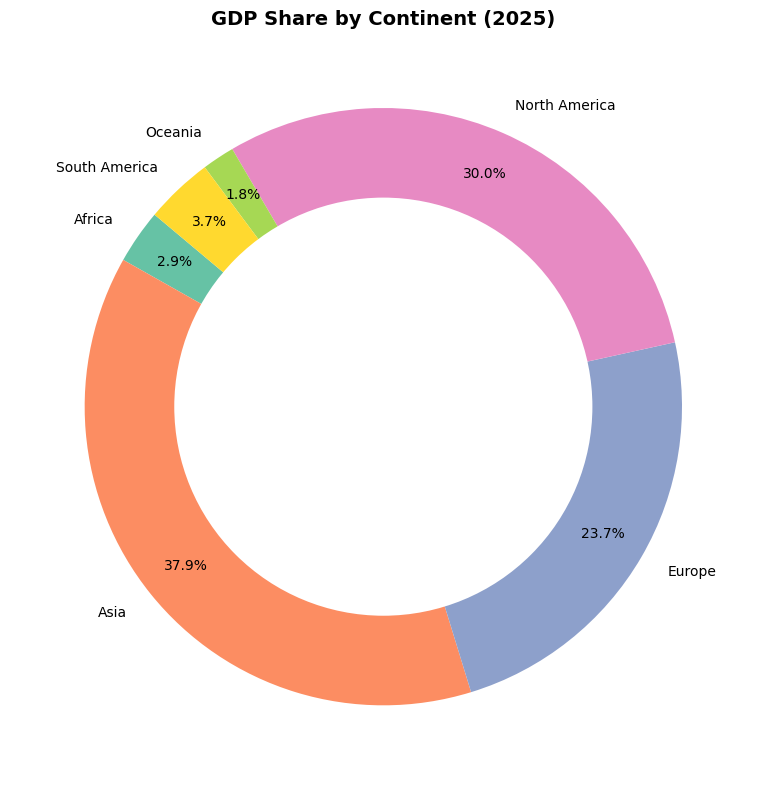

In [94]:
#GDP Share by continent
gdp_2025 = data_long[data_long['Year'] == 2025].groupby('Continent')['GDP'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    gdp_2025,
    labels=gdp_2025.index,      # show continent names
    autopct='%1.1f%%',          # show percentages
    startangle=140,             # rotate for better spacing
    pctdistance=0.85,           # move % labels inside
    labeldistance=1.1,          # move continent names slightly outside
    colors=plt.cm.Set2.colors   # nice clean color palette
)
# Draw circle for donut shape
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("GDP Share by Continent (2025)", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()

The donut chart highlights the global distribution of GDP by continent, showing Asia as the leading contributor with 37.9%, followed by North America (30.0%) and Europe (23.7%). These regions dominate global economic activity, while Africa (2.9%), South America (3.7%), and Oceania (1.8%) play smaller roles. When combined with the earlier trends observed in the line plot, it is evident that global economic growth is largely driven by Asia and North America, with emerging markets gradually gaining momentum. This emphasizes both the concentration of wealth in major economies and the potential for growth in underrepresented regions, providing a comprehensive perspective on global economic dynamics.